# Import thư viện


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from sklearn.metrics import f1_score
from imblearn.combine import SMOTEENN

# Nạp dữ liệu


In [63]:
df = pd.read_csv("data_dotquy.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Tiền xử lý dữ liệu


In [64]:
df.info()  # Xem kiểu dữ liệu (Dtype) và số lượng giá trị không rỗng
df.head()
# Ta thấy cột BMI chỉ có 4909-> Bị thiếu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [65]:
df.isnull().sum()
# Kiểm tra xem bị thiếu bao nhiêu dòng

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [66]:
df.duplicated().sum()
# Không có cái nào bị trùng lặp

np.int64(0)

In [67]:
df.describe(include="all")  # Xem min, max, mean, median

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [68]:
for col in df.columns:
    print(f"--- Kiểm tra cột: {col} ---")
    print(df[col].value_counts())
    print("\n")  # Xuống dòng cho dễ nhìn

--- Kiểm tra cột: id ---
id
44679    1
9046     1
51676    1
31112    1
60182    1
        ..
12109    1
60491    1
27419    1
10434    1
53882    1
Name: count, Length: 5110, dtype: int64


--- Kiểm tra cột: gender ---
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


--- Kiểm tra cột: age ---
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64


--- Kiểm tra cột: hypertension ---
hypertension
0    4612
1     498
Name: count, dtype: int64


--- Kiểm tra cột: heart_disease ---
heart_disease
0    4834
1     276
Name: count, dtype: int64


--- Kiểm tra cột: ever_married ---
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


--- Kiểm tra cột: work_type ---
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


--- Kiểm tra

# Làm sạch dữ liệu


In [69]:
# Xóa cột id
df = df.drop(columns=["id"])
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [70]:
# Xóa 1 cột giới tính khac nam, nữ (other)
mask = df["gender"].isin(["Male", "Female"])
df = df[mask]

In [71]:
# Biến đổi Gender thành số(Male=0, Female=1)
df.loc[:, "gender"] = df["gender"].replace({"Female": 1, "Male": 0})

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_25736\1749739229.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "gender"] = df["gender"].replace({"Female": 1, "Male": 0})


In [72]:
# Biến đổi ever_married thành số(Male=0, Female=1)
df.loc[:, "ever_married"] = df["ever_married"].replace({"Yes": 1, "No": 0})

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_25736\1583976910.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "ever_married"] = df["ever_married"].replace({"Yes": 1, "No": 0})


In [73]:
# Biến đổi work_type thành số
df.loc[:, "work_type"] = df["work_type"].replace(
    {"Govt_job": 0, "Never_worked": 1, "Private": 2, "Self-employed": 3, "children": 4}
)

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_25736\1192263286.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "work_type"] = df["work_type"].replace(


In [74]:
# Biến đổi Residence_type thành số
df.loc[:, "Residence_type"] = df["Residence_type"].replace({"Urban": 0, "Rural": 1})

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_25736\695659656.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "Residence_type"] = df["Residence_type"].replace({"Urban": 0, "Rural": 1})


In [75]:
# Chuẩn hóa age

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df["age"] = scaler.fit_transform(df[["age"]])

# Kiểm tra kết quả
print(df[["age"]].head())

        age
0  0.816895
1  0.743652
2  0.975586
3  0.597168
4  0.963379


In [76]:
# Chuẩn hóa avg_glucose_level

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df["avg_glucose_level"] = scaler.fit_transform(df[["avg_glucose_level"]])

# Kiểm tra kết quả
print(df[["avg_glucose_level"]].head())

   avg_glucose_level
0           0.801265
1           0.679023
2           0.234512
3           0.536008
4           0.549349


In [77]:
# Xử lý BMI bị thiếu bằng hồi quy tuyến tính (Regression)

# Chọn các cột dùng để dự đoán BMI (Tuổi và Đường huyết)
feature_cols = ["age", "avg_glucose_level", "gender"]

# Tách dữ liệu thành 2 phần
data_known = df[df["bmi"].notnull()]  # Dữ liệu đầy đủ (để train)
data_missing = df[df["bmi"].isnull()]  # Dữ liệu bị thiếu (để điền)

# Tạo mô hình và huấn luyện
model = LinearRegression()

# X là các đặc trưng (age, glucose...), y là cái cần tìm (bmi)
X_train = data_known[feature_cols]
y_train = data_known["bmi"]

model.fit(X_train, y_train)

# Dự đoán giá trị cho các ô bị thiếu
# Lấy các đặc trưng của những người bị thiếu BMI
X_missing = data_missing[feature_cols]

# loc[hàng, cột] = giá trị mới bằng model dự đoán
df.loc[df["bmi"].isnull(), "bmi"] = model.predict(X_missing)

# Kiểm tra lại
print(
    f"Số lượng giá trị thiếu sau khi dùng Linear Regression: {df['bmi'].isnull().sum()}"
)

Số lượng giá trị thiếu sau khi dùng Linear Regression: 0


In [78]:
# Chuẩn hóa bmi

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df['bmi'] = scaler.fit_transform(df[['bmi']])

# Kiểm tra kết quả
print("Min:", df['bmi'].min())
print("Max:", df['bmi'].max())
print(df[['bmi']].head())

Min: 0.0
Max: 1.0
        bmi
0  0.301260
1  0.257394
2  0.254296
3  0.276060
4  0.156930


In [79]:
# XỬ LÝ GIÁ TRỊ UNKNOW CỦA CỘT SMOKING_STATUS BẰNG KNN
df_temp = df.copy()

# Chia dữ liệu thành Tập đã biết (Train) và Tập Unknown (Test)
cols_feature = ["age", "bmi", "gender", "avg_glucose_level"]
# Các cột dùng để đoán
train_data = df_temp[df_temp["smoking_status"] != "Unknown"]
test_data = df_temp[df_temp["smoking_status"] == "Unknown"]

# Huấn luyện KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data[cols_feature], train_data["smoking_status"])

# Dự đoán và điền vào
predicted_status = knn.predict(test_data[cols_feature])
df.loc[df["smoking_status"] == "Unknown", "smoking_status"] = predicted_status

In [80]:
# #Biến đổi smoking_status thành số
df.loc[:, 'smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_25736\2701347503.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})


In [81]:
df.info()  # Kiểm tra lại xem còn thiếu gì không

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [82]:
# Chuẩn hóa work_type

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df["work_type"] = scaler.fit_transform(df[["work_type"]])

# Kiểm tra kết quả

print(df[["work_type"]].head())

   work_type
0       0.50
1       0.75
2       0.50
3       0.50
4       0.75


In [83]:
# Chuẩn hóa smoking_status

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df['smoking_status'] = scaler.fit_transform(df[['smoking_status']])

# Kiểm tra kết quả

print(df[['smoking_status']].head())
df

   smoking_status
0             0.5
1             0.0
2             0.0
3             1.0
4             0.0


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.816895,0,1,1,0.50,0,0.801265,0.301260,0.5,1
1,1,0.743652,0,0,1,0.75,1,0.679023,0.257394,0.0,1
2,0,0.975586,0,1,1,0.50,1,0.234512,0.254296,0.0,1
3,1,0.597168,0,0,1,0.50,0,0.536008,0.276060,1.0,1
4,1,0.963379,1,0,1,0.75,1,0.549349,0.156930,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975586,1,0,1,0.50,0,0.132167,0.255752,0.0,0
5106,1,0.987793,0,0,1,0.75,0,0.323516,0.340206,0.0,0
5107,1,0.426270,0,0,1,0.75,1,0.128658,0.232532,0.0,0
5108,0,0.621582,0,0,1,0.50,1,0.513203,0.175258,0.5,0


In [84]:
#   Xuất dl sau khi tiền sử lý
# df.to_csv('sauxuly.csv', index=False)

#TRỰC QUAN HÓA DỮ LIỆU


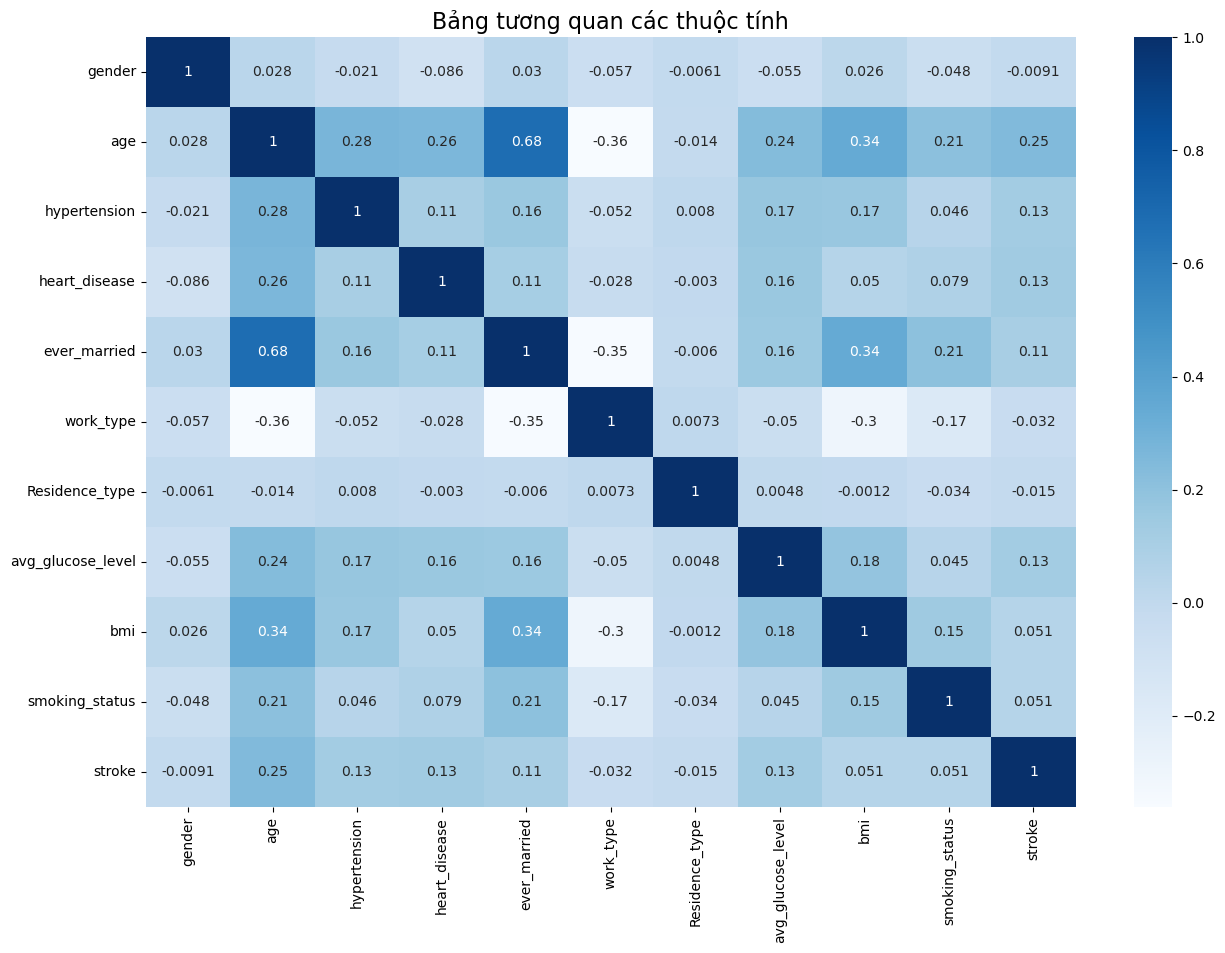

In [85]:
# BẢNG TƯƠNG QUAN
corr = df.corr()
plt.figure(figsize=(15, 10))
plt.title("Bảng tương quan các thuộc tính", fontsize=16)
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_25736\3807854827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stroke", data=df, palette="Set2")


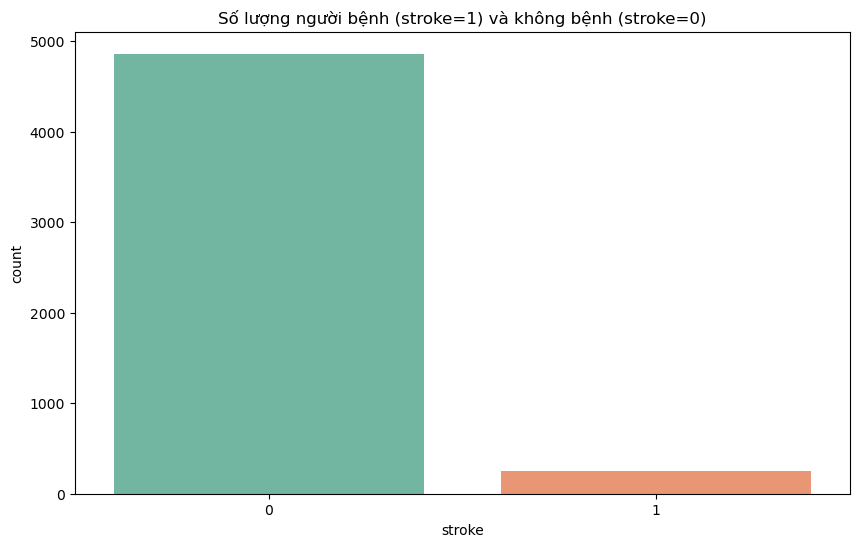

Số người bị đột quỵ: 249


In [86]:
#BIỂU ĐỒ ĐẾM
plt.figure(figsize=(10, 6))
sns.countplot(x="stroke", data=df, palette="Set2")
plt.title('Số lượng người bệnh (stroke=1) và không bệnh (stroke=0)')

plt.show()
print('Số người bị đột quỵ:', (df["stroke"]==1).sum())

In [87]:
# df = df.drop(columns=['ever_married'])
# df = df.drop(columns=['gender'])
# df = df.drop(columns=['work_type'])

#CHIA DỮ LIỆU THÀNH 2 TẬP TRAIN VÀ TEST

XỬ LÝ MẤT CÂN BẰNG DỮ LIỆU BẰNG THỦ CÔNG

In [88]:
# # Tách features và target
# X = df.drop("stroke", axis=1)
# y = df["stroke"]

# # Chia dữ liệu thành train và test
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Gộp lại để dễ xử lý
# train_data = pd.concat([X_train, y_train], axis=1)

# # Tách riêng 2 lớp
# no_stroke = train_data[train_data.stroke == 0]
# stroke = train_data[train_data.stroke == 1]

# # 1. Tăng mẫu (Upsample) cho lớp đột quỵ (stroke)
# # Tăng lên cho bằng 50% số lượng lớp không đột quỵ hiện tại
# n_minority_new = int(len(no_stroke) * 0.5)

# stroke_upsampled = resample(
#     stroke,
#     replace=True,  # Cho phép chọn lặp lại
#     n_samples=n_minority_new,
#     random_state=42,
# )

# # 2. Giảm mẫu (Downsample) cho lớp không đột quỵ (no_stroke)
# # Giảm xuống sao cho tỷ lệ là 0.8 (stroke / no_stroke = 0.8)
# n_majority_new = int(len(stroke_upsampled) / 0.8)

# no_stroke_downsampled = resample(
#     no_stroke,
#     replace=False,  # Không chọn lặp lại
#     n_samples=n_majority_new,
#     random_state=42,
# )

# # Kết hợp lại
# df_resampled = pd.concat([no_stroke_downsampled, stroke_upsampled])

# # Tách lại ra X và y
# X_resampled = df_resampled.drop("stroke", axis=1)
# y_resampled = df_resampled["stroke"]


# print(y_resampled.value_counts())

In [89]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.816895,0,1,1,0.50,0,0.801265,0.301260,0.5,1
1,1,0.743652,0,0,1,0.75,1,0.679023,0.257394,0.0,1
2,0,0.975586,0,1,1,0.50,1,0.234512,0.254296,0.0,1
3,1,0.597168,0,0,1,0.50,0,0.536008,0.276060,1.0,1
4,1,0.963379,1,0,1,0.75,1,0.549349,0.156930,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975586,1,0,1,0.50,0,0.132167,0.255752,0.0,0
5106,1,0.987793,0,0,1,0.75,0,0.323516,0.340206,0.0,0
5107,1,0.426270,0,0,1,0.75,1,0.128658,0.232532,0.0,0
5108,0,0.621582,0,0,1,0.50,1,0.513203,0.175258,0.5,0


XỬ LÝ MẤT CÂN BẰNG DỮ LIỆU BẰNG SMOTE VÀ SMOTEENN

In [90]:
# Tách features và target
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 , stratify=y
)


# #Tăng cường dữ liệu bằng SMOTE
# smote = SMOTE(random_state=42)
# X_train_final, y_train_final = smote.fit_resample(X_train, y_train)

#Tăng cường dữ liệu bằng SMOTEEN
smote_enn = SMOTEENN(random_state=42)
X_train_final, y_train_final = smote_enn.fit_resample(X_train, y_train)


Ngưỡng tối ưu (Threshold): 0.5900000000000002
F1-Score tốt nhất tại ngưỡng này: 0.2394
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.18      0.34      0.24        50

    accuracy                           0.89      1022
   macro avg       0.57      0.63      0.59      1022
weighted avg       0.93      0.89      0.91      1022

Độ chính xác của mô hình Random Forest là:  86.79060665362034 %


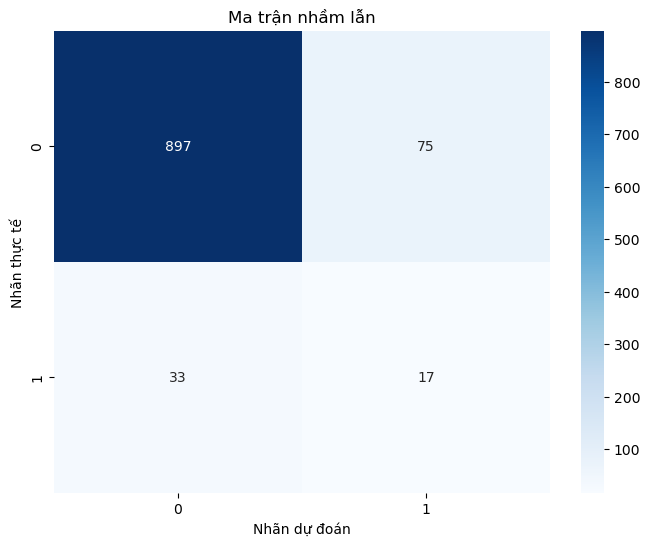

In [91]:
# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Sử dụng Bayesian Optimization để tìm kiếm siêu tham số tốt nhất
param_dist = {
    "n_estimators": (100, 1000),
    "max_depth": (5, 50),
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 10),
    "bootstrap": [True, False],
}

bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring="f1",
    random_state=42,
)
bayes_search.fit(X_train_final, y_train_final)
best_params = bayes_search.best_params_

# Tạo mô hình với siêu tham số tốt nhất
best_rf = RandomForestClassifier(**best_params, random_state=42)
# Huấn luyện mô hình
best_rf.fit(X_train_final, y_train_final)
# Thay vì predict ngay, hãy lấy xác suất
y_prob = best_rf.predict_proba(X_test)
y_prob_class_1 = y_prob[:, 1]

# Tìm ngưỡng tốt nhất cho F1-score trên tập Test
best_thresh = 0.3
best_f1 = 0
thresholds = np.arange(0.05, 0.6, 0.01) # Quét từ 0.05 đến 0.6

for thresh in thresholds:
    y_pred_temp = (y_prob_class_1 >= thresh).astype(int)
    score = f1_score(y_test, y_pred_temp)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"\nNgưỡng tối ưu (Threshold): {best_thresh}")
print(f"F1-Score tốt nhất tại ngưỡng này: {best_f1:.4f}")
# Dự đoán trên tập kiểm tra
y_pred_final = (y_prob_class_1 >= best_thresh).astype(int)
y_pred = y_pred_final

# Đánh giá mô hình
print(classification_report(y_test, y_pred))
print(
    "Độ chính xác của mô hình Random Forest là: ",
    best_rf.score(X_test, y_test) * 100,
    "%",
)


# Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(best_rf, X_test, y_test):

    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y_test),
        yticklabels=np.unique(y_test),
    )
    plt.xlabel("Nhãn dự đoán")
    plt.ylabel("Nhãn thực tế")
    plt.title("Ma trận nhầm lẫn")
    plt.show()


# Gọi hàm để vẽ ma trận nhầm lẫn
plot_confusion_matrix(best_rf, X_test, y_test)

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_25736\3522945656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


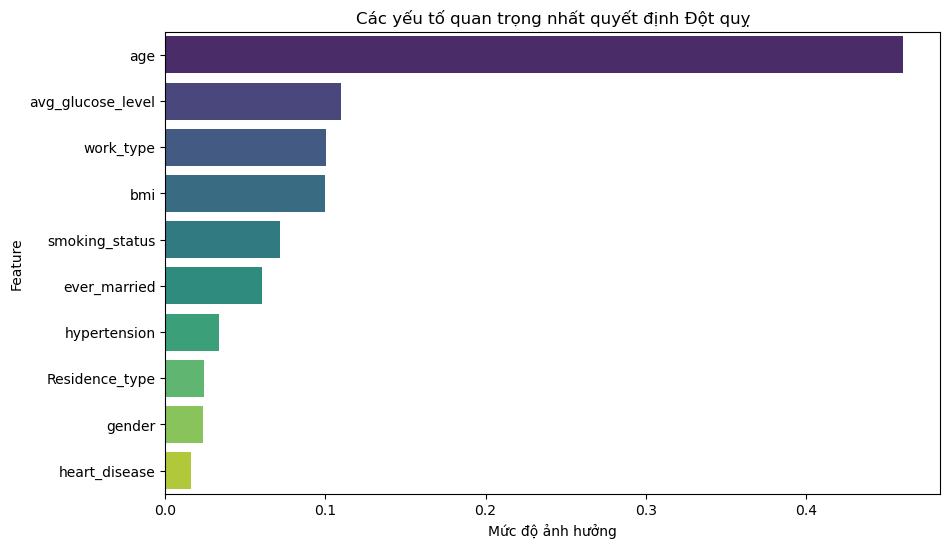

In [92]:
# vẽ biểu đồ các yếu tố quan trọng
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train_final)
importances = rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Các yếu tố quan trọng nhất quyết định Đột quỵ')
plt.xlabel('Mức độ ảnh hưởng')
plt.show()